To practice more on deep learning parameters and methods I created this project. I will use quite small dataset on this project to run the cells faster.

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris 

In [2]:
# get the data 
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# the features 
X = iris.data
# the target
y = iris.target

In [8]:
# to categorize the y I'll use a keras module
import tensorflow as tf

y = tf.keras.utils.to_categorical(y)
y # 1,0,0 stands for 1 and so on

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [9]:
y.shape

(150, 3)

In [10]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [13]:
y_train.shape

(100, 3)

In [14]:
# scale the features

from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.fit_transform(X_test)

In [15]:
# generate the network
from tensorflow import keras
from keras.layers import Dense
model = keras.Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [17]:
# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='acc')

In [39]:
# fit the model
from keras.callbacks import EarlyStopping
stop_early = EarlyStopping(monitor='loss', patience=5)
model.fit(X_train, y_train, validation_data=[X_test, y_test], batch_size=10, epochs=5, callbacks=stop_early)

Epoch 1/5
10/10 [==============================] - 0s 22ms/step - loss: 0.0347 - acc: 0.9900 - val_loss: 0.0506 - val_acc: 0.9600
Epoch 2/5
10/10 [==============================] - 0s 11ms/step - loss: 0.0289 - acc: 0.9900 - val_loss: 0.0537 - val_acc: 0.9800
Epoch 3/5
10/10 [==============================] - 0s 8ms/step - loss: 0.0336 - acc: 0.9900 - val_loss: 0.0516 - val_acc: 0.9800
Epoch 4/5
10/10 [==============================] - 0s 6ms/step - loss: 0.0335 - acc: 0.9900 - val_loss: 0.0513 - val_acc: 0.9800
Epoch 5/5
10/10 [==============================] - 0s 5ms/step - loss: 0.0280 - acc: 0.9900 - val_loss: 0.0500 - val_acc: 0.9600


In [40]:
# model seems very successful but it is because the overfitting so I want the plot both the actual and the predicted values
preds = model.predict(X_test)

In [41]:
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], batch_size=10, epochs=5, callbacks=stop_early)

Epoch 1/5
10/10 [==============================] - 0s 27ms/step - loss: 0.0321 - acc: 0.9900 - val_loss: 0.0517 - val_acc: 0.9800
Epoch 2/5
10/10 [==============================] - 0s 20ms/step - loss: 0.0289 - acc: 0.9900 - val_loss: 0.0575 - val_acc: 0.9800
Epoch 3/5
10/10 [==============================] - 0s 17ms/step - loss: 0.0281 - acc: 0.9900 - val_loss: 0.0483 - val_acc: 0.9600
Epoch 4/5
10/10 [==============================] - 0s 14ms/step - loss: 0.0276 - acc: 0.9900 - val_loss: 0.0472 - val_acc: 0.9600
Epoch 5/5
10/10 [==============================] - 0s 8ms/step - loss: 0.0266 - acc: 1.0000 - val_loss: 0.0576 - val_acc: 0.9800


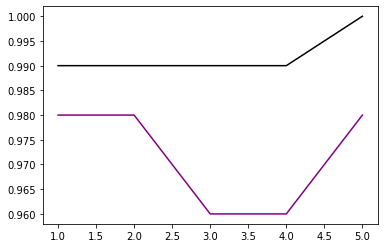

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, val_acc, label='validation', c='purple')
plt.plot(epochs, acc, label='actual', c='black')
plt.show()

As I guessed that our model seems so successful but there is overfitting . We can see by that aproximately after the epoch 2 validation accuracy starts to decrease but on the other hand training accuracy goes the opposite way which is accuracy = 1 (after epoch 4). Actually it is very usual to have this result because I have very small dataset but I generated kinda complex model so let's try it one more round :)

In [43]:
# generate the network again
model = keras.Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [44]:
# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='acc')

In [51]:
# fit the model
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], batch_size=10, epochs=5, callbacks=stop_early)

Epoch 1/5
10/10 [==============================] - 0s 13ms/step - loss: 0.2712 - acc: 0.9000 - val_loss: 0.2679 - val_acc: 0.8800
Epoch 2/5
10/10 [==============================] - 0s 9ms/step - loss: 0.2637 - acc: 0.9000 - val_loss: 0.2616 - val_acc: 0.8800
Epoch 3/5
10/10 [==============================] - 0s 8ms/step - loss: 0.2564 - acc: 0.8900 - val_loss: 0.2550 - val_acc: 0.8800
Epoch 4/5
10/10 [==============================] - 0s 7ms/step - loss: 0.2499 - acc: 0.9000 - val_loss: 0.2490 - val_acc: 0.9000
Epoch 5/5
10/10 [==============================] - 0s 4ms/step - loss: 0.2429 - acc: 0.8900 - val_loss: 0.2431 - val_acc: 0.9000


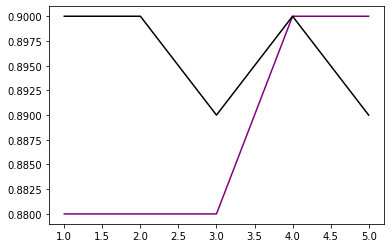

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, val_acc, label='validation', c='purple')
plt.plot(epochs, acc, label='actual', c='black')
plt.show()

This plot looks more healthier than the previous one. I think that's because we got rid off the overfitting also model has 0.9 validation accuracy .